In [1]:
import torch
import numpy as np
import pandas as pd

from models.resnet import ResNet50
from utils.reproducibility import make_it_reproducible, seed_worker
from utils.datasets import get_datasets
from utils.sampling import get_user_groups

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
tot_users = 100

In [3]:
# reproducibility
seed = 0

g = torch.Generator()

In [4]:
# datasets and loaders
trainset, testset = get_datasets()

Files already downloaded and verified
Files already downloaded and verified


In [31]:
# iid balanced
iid = True
unbalanced = False

make_it_reproducible(seed)
g.manual_seed(seed)
testloader = torch.utils.data.DataLoader(testset,
                                     batch_size=128, shuffle=False, num_workers=2,
                                     worker_init_fn=seed_worker, generator=g)
user_groups, user_dict_cls_count = get_user_groups(trainset, iid=iid, unbalanced=unbalanced, tot_users=tot_users)
labels = trainset.targets

df = pd.DataFrame(user_dict_cls_count)
m = df.count(axis=0)
print("seen classes: ", m.mean(), "+-", m.std())  # 10.0 +- 0.0

seen classes:  10.0 +- 0.0


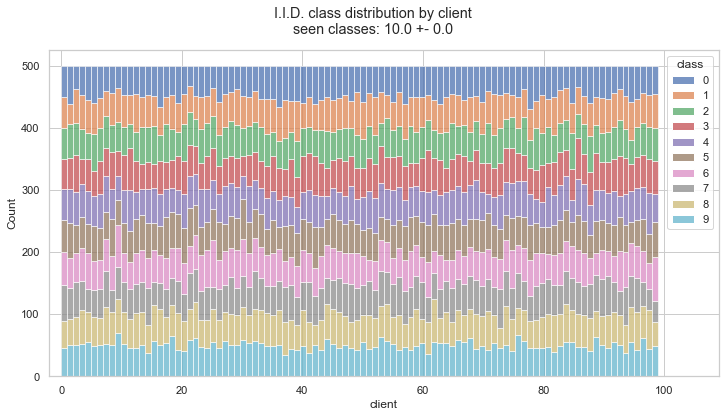

In [32]:
df = df.transpose()
df = df.stack().reset_index()
df.columns = ["client", "class", "count"]
df = df.astype({"class": str,})

sns.set()
sns.set_style(style="whitegrid")
sns.set_color_codes("colorblind")

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle(f"""I.I.D. class distribution by client
seen classes: {m.mean():} +- {m.std():.3}""")
sns.histplot(data=df, x="client", hue="class", weights="count", multiple="stack", bins=tot_users, ax=ax)
ax.set_xlim([-2, 109])
plt.savefig("iid_class_distribution.pdf", bbox_inches="tight")

In [33]:
# non iid balanced
iid = False
unbalanced = False

make_it_reproducible(seed)
g.manual_seed(seed)
testloader = torch.utils.data.DataLoader(testset,
                                     batch_size=128, shuffle=False, num_workers=2,
                                     worker_init_fn=seed_worker, generator=g)
user_groups, user_dict_cls_count = get_user_groups(trainset, iid=iid, unbalanced=unbalanced, tot_users=tot_users)
labels = trainset.targets

df = pd.DataFrame(user_dict_cls_count)
df.replace(0, np.nan, inplace=True)
m = df.count(axis=0)
print("seen classes: ", m.mean(), "+-", m.std())  # 1.94 +- 0.23868325657594203

seen classes:  1.94 +- 0.23868325657594194


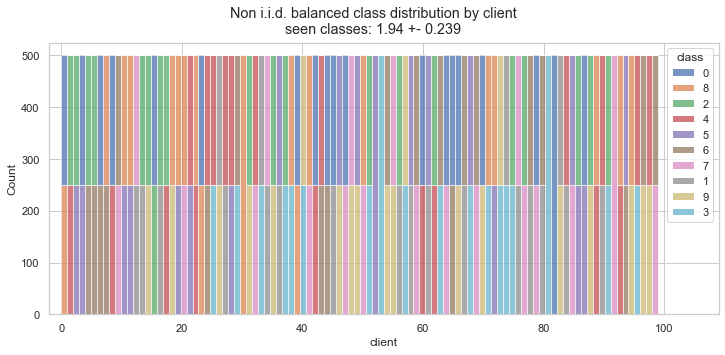

In [34]:
df = df.transpose()
df = df.stack().reset_index()
df.columns = ["client", "class", "count"]
df = df.astype({"class": str,})

sns.set()
sns.set_style(style="whitegrid")
sns.set_color_codes("colorblind")

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
fig.suptitle(f"""Non i.i.d. balanced class distribution by client
seen classes: {m.mean()} +- {m.std():.3}""")
sns.histplot(data=df, x="client", hue="class", weights="count", multiple="stack", bins=tot_users, ax=ax)
ax.set_xlim([-2, 109])
plt.savefig("noniid_balanced_class_distribution.pdf", bbox_inches="tight")

In [35]:
# non iid unbalanced
iid = False
unbalanced = True

make_it_reproducible(seed)
g.manual_seed(seed)
testloader = torch.utils.data.DataLoader(testset,
                                     batch_size=128, shuffle=False, num_workers=2,
                                     worker_init_fn=seed_worker, generator=g)
user_groups, user_dict_cls_count = get_user_groups(trainset, iid=iid, unbalanced=unbalanced, tot_users=tot_users)
labels = trainset.targets

df = pd.DataFrame(user_dict_cls_count)
df.replace(0, np.nan, inplace=True)
m = df.count(axis=0)
print("seen classes: ", m.mean(), "+-", m.std())  # 1.84 +- 1.0609696346533988

seen classes:  1.84 +- 1.0609696346533988


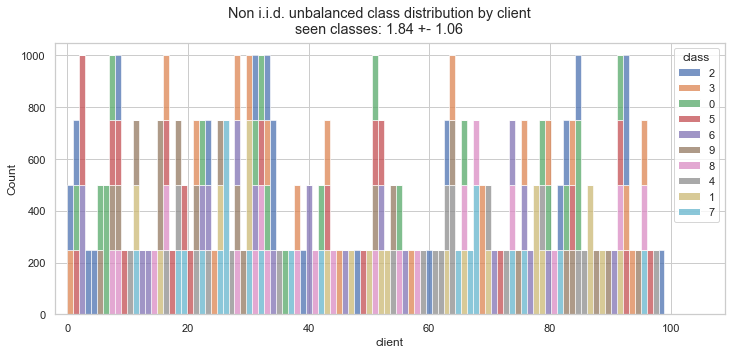

In [36]:
df = df.transpose()
df = df.stack().reset_index()
df.columns = ["client", "class", "count"]
df = df.astype({"class": str,})

sns.set()
sns.set_style(style="whitegrid")
sns.set_color_codes("colorblind")

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
fig.suptitle(f"""Non i.i.d. unbalanced class distribution by client
seen classes: {m.mean()} +- {m.std():.3}""")
sns.histplot(data=df, x="client", hue="class", weights="count", multiple="stack", bins=tot_users, ax=ax)
ax.set_xlim([-2, 109])
plt.savefig("noniid_unbalanced_class_distribution.pdf", bbox_inches="tight")